In [101]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import emoji

In [2]:
f = open ("F:\Resume Projects\Whatsapp Group Chat Analyzer\_chat.txt", 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
data

'[2018-02-03, 8:54:59\u202fAM] 🧡Nanka Mail💛: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[2018-02-03, 8:54:59\u202fAM] Palak : \u200ePalak  created this group\n[2018-02-03, 8:54:59\u202fAM] 🧡Nanka Mail💛: \u200eYou were added\n[2022-05-10, 3:34:49\u202fPM] Bikramjot Singh: Hello.. please save my new number\n[2022-05-10, 9:20:12\u202fPM] Sagar Kohali: Theek aa ji 😄\n[2022-05-10, 9:49:26\u202fPM] Simi Mami: Ok beta\n[2022-05-11, 10:17:56\u202fAM] Papa Ji: ╬═╬ ਪੌੜੀ\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬  \n╬═╬\n╬═╬ \n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬  \n╬═╬\n╬═╬ ਥੱਲੇ ਨਾ ਜਾ ਮੈਂ ਕਹਿੰਦਾ ਹਾਂ\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬  \n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬  \n╬═╬\n╬═╬ ਮੈਂ ਇੱਕ ਵਾਰ ਫਿਰ ਕਹਿੰਦਾ ਹਾਂ ਥੱਲੇ ਨਾ ਜਾ\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬  \n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬  \n╬═╬\n╬═╬ ਤੇਰਾ ਟਾਈਮ ਖਰਾਬ ਹੀ ਹੋਣਾ\n╬═╬\n╬═╬\n╬═╬\n╬═╬\n╬═╬\

In [5]:
pattern = '\[(\d{4}-\d{2}-\d{2},\s\d{1,2}:\d{2}:\d{2}\s[APMapm]{2})\]'


In [6]:
messages = re.split(pattern, data)
len(messages)

19141

In [7]:
len(messages)

19141

In [8]:
dates = re.findall(pattern, data)
len(dates)

9570

In [9]:
messages = messages[:len(dates)]

In [10]:
 df = pd.DataFrame({'user_message': messages, 'message_date': dates})

In [11]:
df

,user_message,message_date
0,,"2018-02-03, 8:54:59 AM"
1,"2018-02-03, 8:54:59 AM","2018-02-03, 8:54:59 AM"
2,🧡Nanka Mail💛: ‎Messages and calls are end-to-...,"2018-02-03, 8:54:59 AM"
3,"2018-02-03, 8:54:59 AM","2022-05-10, 3:34:49 PM"
4,Palak : ‎Palak created this group\n,"2022-05-10, 9:20:12 PM"
...,...,...
9565,"2023-03-09, 12:46:00 AM","2023-12-24, 2:39:57 AM"
9566,Shivani Bhabi: Happy marriage anniversary Mas...,"2023-12-24, 3:04:53 AM"
9567,"2023-03-09, 1:41:28 AM","2023-12-24, 9:52:22 AM"
9568,Paras Kohali: Happy marriage anniversary bhua...,"2023-12-24, 9:52:47 AM"


In [12]:
 # convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format= '%Y-%m-%d, %I:%M:%S %p')

In [13]:
df.rename(columns={'message_date': 'date'}, inplace=True)

In [14]:
df

,user_message,date
0,,2018-02-03 08:54:59
1,"2018-02-03, 8:54:59 AM",2018-02-03 08:54:59
2,🧡Nanka Mail💛: ‎Messages and calls are end-to-...,2018-02-03 08:54:59
3,"2018-02-03, 8:54:59 AM",2022-05-10 15:34:49
4,Palak : ‎Palak created this group\n,2022-05-10 21:20:12
...,...,...
9565,"2023-03-09, 12:46:00 AM",2023-12-24 02:39:57
9566,Shivani Bhabi: Happy marriage anniversary Mas...,2023-12-24 03:04:53
9567,"2023-03-09, 1:41:28 AM",2023-12-24 09:52:22
9568,Paras Kohali: Happy marriage anniversary bhua...,2023-12-24 09:52:47


In [15]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

In [16]:
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [17]:
df

,date,user,message
0,2018-02-03 08:54:59,group_notification,
1,2018-02-03 08:54:59,group_notification,"2018-02-03, 8:54:59 AM"
2,2018-02-03 08:54:59,🧡Nanka Mail💛,‎Messages and calls are end-to-end encrypted. ...
3,2022-05-10 15:34:49,group_notification,"2018-02-03, 8:54:59 AM"
4,2022-05-10 21:20:12,Palak,‎Palak created this group\n
...,...,...,...
9565,2023-12-24 02:39:57,group_notification,"2023-03-09, 12:46:00 AM"
9566,2023-12-24 03:04:53,Shivani Bhabi,Happy marriage anniversary Masi g&masad g🙏🏻\n
9567,2023-12-24 09:52:22,group_notification,"2023-03-09, 1:41:28 AM"
9568,2023-12-24 09:52:47,Paras Kohali,Happy marriage anniversary bhua ji and fuffar ...


In [18]:
    df['only_date'] = df['date'].dt.date
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

In [19]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [20]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2018-02-03 08:54:59,group_notification,,2018-02-03,2018,2,February,3,Saturday,8,54,8-9
1,2018-02-03 08:54:59,group_notification,"2018-02-03, 8:54:59 AM",2018-02-03,2018,2,February,3,Saturday,8,54,8-9
2,2018-02-03 08:54:59,🧡Nanka Mail💛,‎Messages and calls are end-to-end encrypted. ...,2018-02-03,2018,2,February,3,Saturday,8,54,8-9
3,2022-05-10 15:34:49,group_notification,"2018-02-03, 8:54:59 AM",2022-05-10,2022,5,May,10,Tuesday,15,34,15-16
4,2022-05-10 21:20:12,Palak,‎Palak created this group\n,2022-05-10,2022,5,May,10,Tuesday,21,20,21-22
...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2023-12-24 02:39:57,group_notification,"2023-03-09, 12:46:00 AM",2023-12-24,2023,12,December,24,Sunday,2,39,2-3
9566,2023-12-24 03:04:53,Shivani Bhabi,Happy marriage anniversary Masi g&masad g🙏🏻\n,2023-12-24,2023,12,December,24,Sunday,3,4,3-4
9567,2023-12-24 09:52:22,group_notification,"2023-03-09, 1:41:28 AM",2023-12-24,2023,12,December,24,Sunday,9,52,9-10
9568,2023-12-24 09:52:47,Paras Kohali,Happy marriage anniversary bhua ji and fuffar ...,2023-12-24,2023,12,December,24,Sunday,9,52,9-10


In [21]:
df = df.drop(df[df['user'] == 'group_notification'].index)

In [22]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
2,2018-02-03 08:54:59,🧡Nanka Mail💛,‎Messages and calls are end-to-end encrypted. ...,2018-02-03,2018,2,February,3,Saturday,8,54,8-9
4,2022-05-10 21:20:12,Palak,‎Palak created this group\n,2022-05-10,2022,5,May,10,Tuesday,21,20,21-22
6,2022-05-11 10:17:56,🧡Nanka Mail💛,‎You were added\n,2022-05-11,2022,5,May,11,Wednesday,10,17,10-11
8,2022-05-11 11:01:41,Bikramjot Singh,Hello.. please save my new number\n,2022-05-11,2022,5,May,11,Wednesday,11,1,11-12
10,2022-05-12 13:48:52,Sagar Kohali,Theek aa ji 😄\n,2022-05-12,2022,5,May,12,Thursday,13,48,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...
9560,2023-12-23 08:24:06,Simi Mami,ਬਹੁਤ ਬਹੁਤ ਮੁਬਾਰਕਾਂ ਹੋਣ ਦੀਦੀ ਜੀ ਅਤੇ ਭਾਜੀ ਨੂੰ ...,2023-12-23,2023,12,December,23,Saturday,8,24,8-9
9562,2023-12-23 23:50:58,Jagdish Masi,Happy marriage anniversary g🌸🌸❤❤🎂\n,2023-12-23,2023,12,December,23,Saturday,23,50,23-00
9564,2023-12-24 00:53:40,Mom Ji,Happy marriage anniversary bhenji and bhaji🌹🌸🎂\n,2023-12-24,2023,12,December,24,Sunday,0,53,00-1
9566,2023-12-24 03:04:53,Shivani Bhabi,Happy marriage anniversary Masi g&masad g🙏🏻\n,2023-12-24,2023,12,December,24,Sunday,3,4,3-4


In [23]:
#total number of messages

num_messages = df.shape[0]
num_messages

4784

In [24]:
#total number of words
words = []
for message in df['message']:
    words.extend(message.split())

len(words)

37946

In [33]:
# Most_busy_users(df), Messages per user
most_busy_users = df['user'].value_counts().reset_index()
most_busy_users

,index,user
0,Mom Ji,620
1,Papa Ji,610
2,Bikramjot Singh,562
3,~ Manpreet Singh,364
4,Simi Mami,332
5,Gurmeet Mama Ji,300
6,Simrat Jassal,283
7,Gurpreet Didi,282
8,Rana Veer,204
9,Paras Kohali,193


In [45]:
# Top 10 Most_busy_users(df), 
most_busy_users = df['user'].value_counts().head(10)
most_busy_users

 Mom Ji              620
 Papa Ji             610
 Bikramjot Singh     562
 ~ Manpreet Singh    364
 Simi Mami           332
 Gurmeet Mama Ji     300
 Simrat Jassal       283
 Gurpreet Didi       282
 Rana Veer           204
 Paras Kohali        193
Name: user, dtype: int64

In [46]:
name = most_busy_users.index
count = most_busy_users.values

<function matplotlib.pyplot.show(close=None, block=None)>

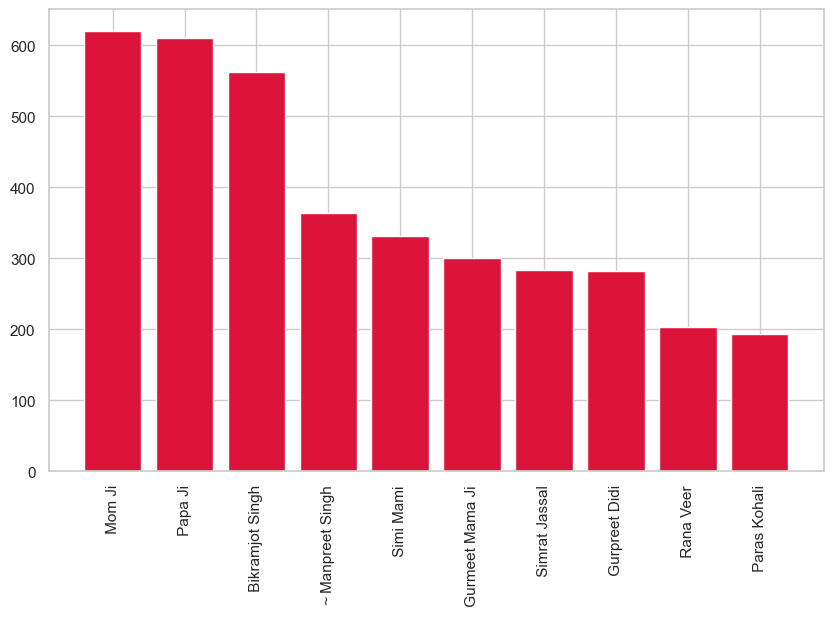

In [192]:
plt.figure(figsize=(10, 6))
plt.bar(name, count, color = 'crimson')
plt.xticks(rotation = 'vertical')
plt.show

In [62]:
# Percentage of contribution in the group chat
user_percentage = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percent'})
user_percentage = user_percentage.head(15)
user_percentage

,name,percent
0,Mom Ji,12.96
1,Papa Ji,12.75
2,Bikramjot Singh,11.75
3,~ Manpreet Singh,7.61
4,Simi Mami,6.94
5,Gurmeet Mama Ji,6.27
6,Simrat Jassal,5.92
7,Gurpreet Didi,5.89
8,Rana Veer,4.26
9,Paras Kohali,4.03


Text(0.5, 1.0, 'Percentage of User Contribution')

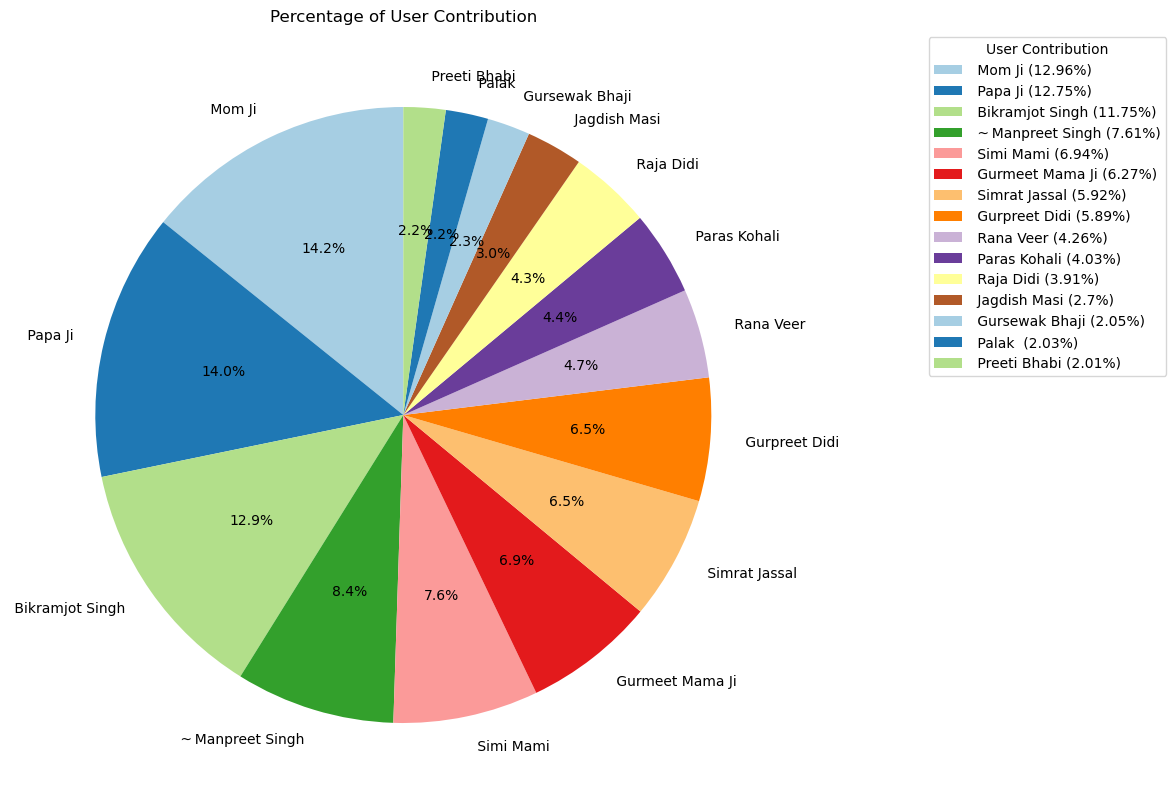

In [83]:
fig, ax = plt.subplots(figsize=(20, 10))
colors = plt.cm.Paired.colors
wedges, texts, autotexts = ax.pie(user_percentage['percent'], labels=user_percentage['name'], autopct='%1.1f%%', startangle=90, colors=colors)

legend_labels = [f'{name} ({percent}%)' for name, percent in zip(user_percentage['name'], user_percentage['percent'])]
ax.legend(wedges, legend_labels, title='User Contribution', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Percentage of User Contribution')

In [125]:
words = []

for message in df['message']:
    for word in message.lower().split():
        words.append(word)

most_common_df = pd.DataFrame(Counter(words).most_common(20), columns=['word', 'count'])
most_common_df

,word,count
0,╬═╬,1493
1,‎,1461
2,omitted,1460
3,‎image,869
4,happy,437
5,‎video,420
6,ਨੂੰ,301
7,birthday,300
8,ji,290
9,ਦੇ,267


C:\Users\bikra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2600 (\N{GURMUKHI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bikra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Gurmukhi natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bikra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2626 (\N{GURMUKHI VOWEL SIGN UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bikra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2672 (\N{GURMUKHI TIPPI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bikra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2598 (\N{GURMUKHI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bikra\anaconda3\lib\site-package

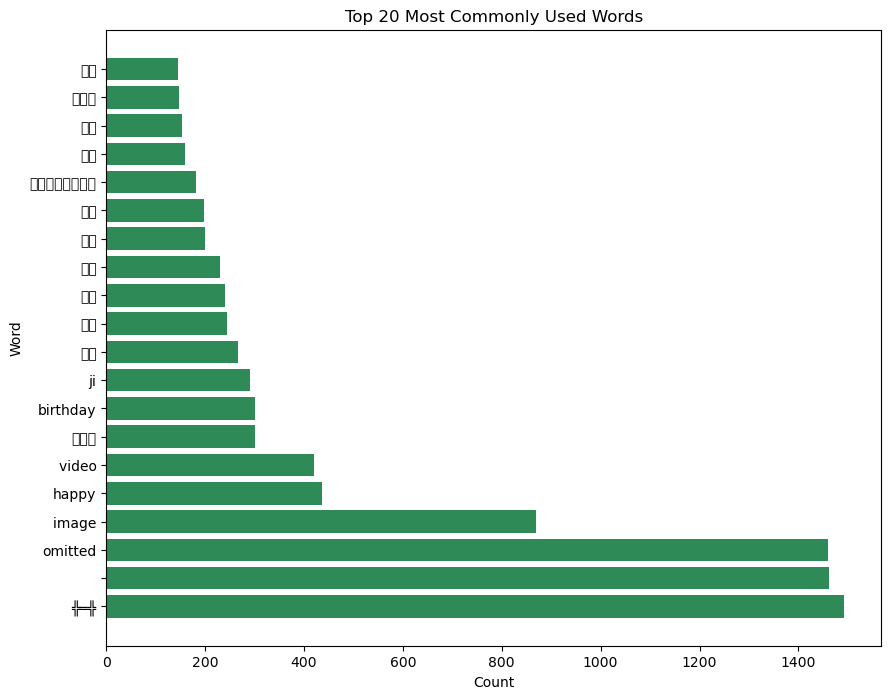

In [126]:
# Top 20 Most commonly Used words

plt.figure(figsize=(10, 8))
plt.barh(most_common_df['word'], most_common_df['count'], color='seagreen')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Most Commonly Used Words')
plt.show()

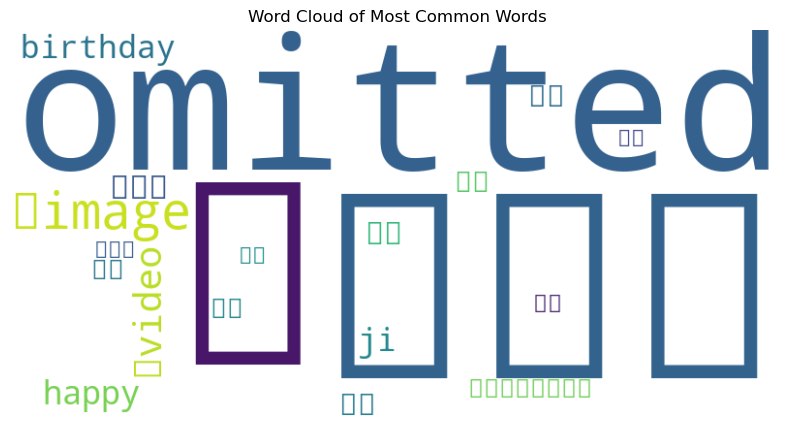

In [113]:
# Wordcloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(most_common_df['word'], most_common_df['count'])))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

In [117]:
#monthly timeline
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2018,2,February,1
1,2022,5,May,100
2,2022,6,June,192
3,2022,7,July,198
4,2022,8,August,344
5,2022,9,September,478
6,2022,10,October,206
7,2022,11,November,137
8,2022,12,December,181
9,2023,1,January,278


In [127]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

timeline['time'] = time

In [128]:
timeline

,year,month_num,month,message,time
0,2018,2,February,1,February-2018
1,2022,5,May,100,May-2022
2,2022,6,June,192,June-2022
3,2022,7,July,198,July-2022
4,2022,8,August,344,August-2022
5,2022,9,September,478,September-2022
6,2022,10,October,206,October-2022
7,2022,11,November,137,November-2022
8,2022,12,December,181,December-2022
9,2023,1,January,278,January-2023


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


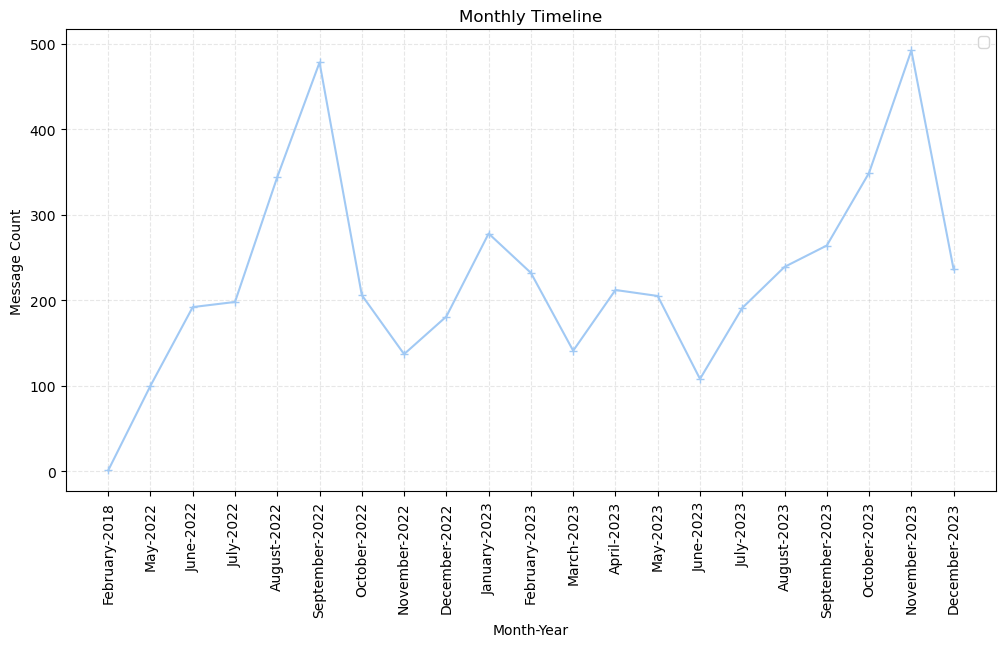

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(timeline['time'], timeline['message'], marker = '+')
plt.xlabel('Month-Year')
plt.ylabel('Message Count')
plt.title('Monthly Timeline')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

In [149]:
#daily timeline
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline.drop(index=daily_timeline.index[0], inplace=True)
daily_timeline

,only_date,message
1,2022-05-10,1
2,2022-05-11,2
3,2022-05-12,1
4,2022-05-13,1
5,2022-05-14,3
...,...,...
485,2023-12-20,3
486,2023-12-21,7
487,2023-12-22,8
488,2023-12-23,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


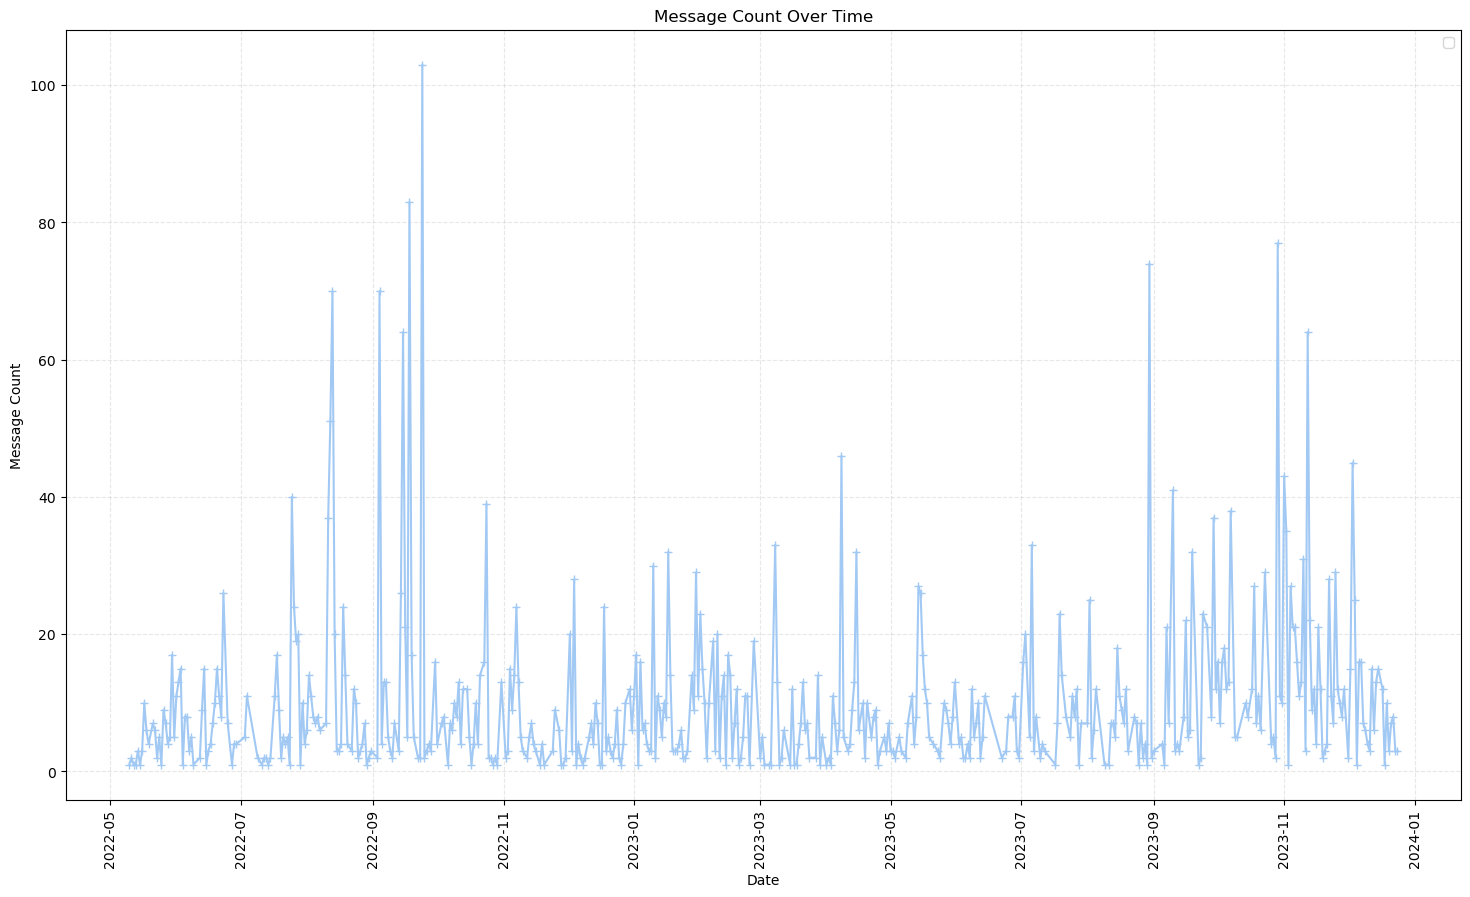

In [156]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'], marker = '+')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.title('Message Count Over Time')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

In [147]:
#week activity map
weekly_activity = df['day_name'].value_counts()
weekly_activity

Sunday       903
Saturday     726
Wednesday    726
Thursday     665
Tuesday      646
Monday       581
Friday       537
Name: day_name, dtype: int64

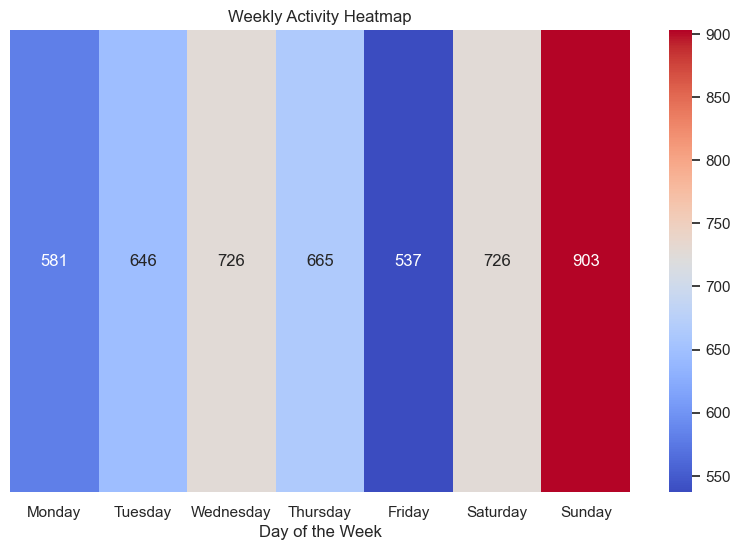

In [191]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_activity = weekly_activity.reindex(days_order)
heatmap_data = weekly_activity.values.reshape(1, -1)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', xticklabels=days_order, yticklabels=False, cbar=True)
plt.xlabel('Day of the Week')
plt.title('Weekly Activity Heatmap')
plt.show()

In [165]:
#monthly activity map
monthly_activity = df['month'].value_counts()
monthly_activity

September    742
November     629
August       583
October      555
December     417
July         389
May          305
June         300
January      278
February     233
April        212
March        141
Name: month, dtype: int64

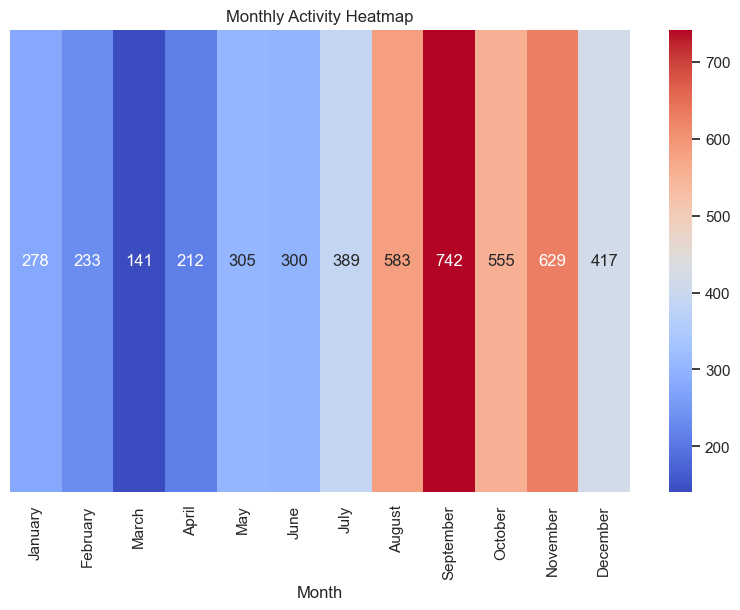

In [190]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_activity = monthly_activity.reindex(months_order)

heatmap_data = monthly_activity.values.reshape(1, -1)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="viridis")
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', xticklabels=months_order, yticklabels=False, cbar=True)
plt.xlabel('Month')
plt.title('Monthly Activity Heatmap')
plt.show()

In [166]:
#user_heatmap
user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
user_heatmap

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,28.0,25.0,25.0,45.0,36.0,40.0,37.0,7.0,4.0,3.0,...,15.0,30.0,20.0,25.0,31.0,23.0,27.0,22.0,38.0,28.0
Monday,24.0,41.0,44.0,48.0,48.0,20.0,3.0,4.0,1.0,2.0,...,17.0,28.0,34.0,23.0,17.0,20.0,22.0,29.0,31.0,72.0
Saturday,24.0,35.0,54.0,130.0,88.0,84.0,27.0,12.0,3.0,2.0,...,8.0,8.0,20.0,24.0,25.0,13.0,31.0,32.0,37.0,35.0
Sunday,31.0,22.0,80.0,61.0,115.0,23.0,22.0,66.0,1.0,1.0,...,8.0,14.0,24.0,25.0,49.0,38.0,34.0,73.0,40.0,131.0
Thursday,32.0,29.0,69.0,51.0,52.0,26.0,48.0,10.0,20.0,5.0,...,19.0,17.0,28.0,32.0,32.0,22.0,40.0,11.0,53.0,26.0
Tuesday,26.0,28.0,42.0,53.0,82.0,45.0,22.0,17.0,4.0,1.0,...,9.0,27.0,38.0,24.0,24.0,10.0,20.0,32.0,32.0,53.0
Wednesday,36.0,34.0,67.0,62.0,55.0,21.0,25.0,4.0,3.0,0.0,...,7.0,12.0,32.0,41.0,20.0,27.0,98.0,21.0,37.0,62.0


Text(0.5, 1.0, 'User Activity Heatmap')

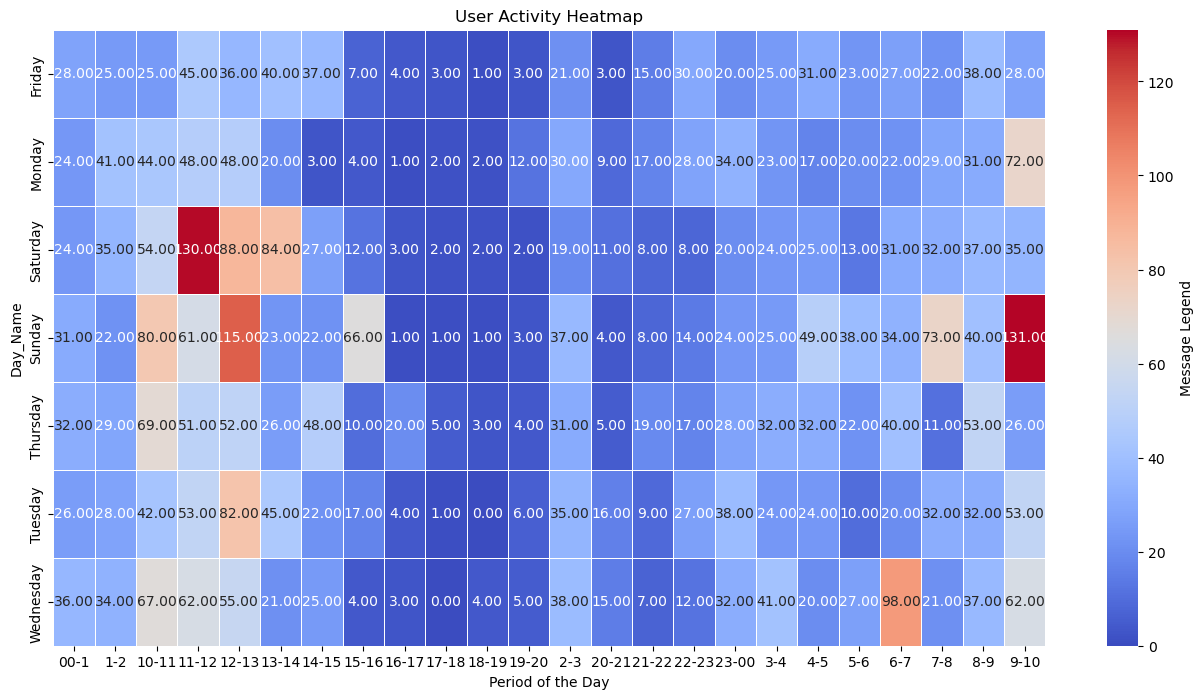

In [175]:
plt.figure(figsize = (16,8))
sns.heatmap(user_heatmap, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Message Legend'})
plt.xlabel('Period of the Day')
plt.ylabel('Day_Name')
plt.title('User Activity Heatmap')